# Inverse CDF method for Sampling
This notebook will take a look at the inverse-CDF method for sampling a distribution. Assume we want to draw random samples from a distribution with the pdf $f_X(x)$ defined as

$
f_X(x) = \begin{cases}
           3x^2             & \text{if }x\in[0,1]\\
           0                & \text{otherwise}
         \end{cases}.
$

We can plot this pdf as well.

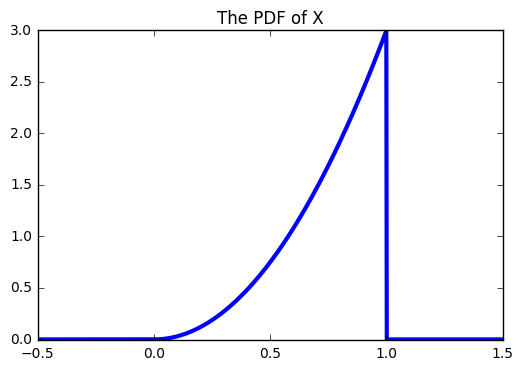

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as ss
import numpy as np

# Defining the pdf
f_X = lambda x: 3*x**2 if x>=0 and x<=1  else 0

# Calculating x and y values
x = np.linspace(-0.5, 1.5, 1000); y = np.array(map(f_X, x))

# Plotting the PDF
plt.plot(x,y, lw = 3)
plt.xlim(-0.5, 1.5)
plt.ylim(-0.01, 3)
plt.title("The PDF of X")
plt.show()

We first need to find the CDF, $F_X(x)$, of the distribution. The CDF can be calculated by integrating the PDF.

\begin{align*}
  F_X(x) &= \int_{-\infty}^x f_X(t) \;dt \\
         &= \begin{cases}
           0                               & \text{if }x < 0  \\
           \int_0^x 3t^2 \;dt              & \text{if }x\in[0,1] \\
           1                               & \text{if }x > 1  
         \end{cases}.
\end{align*}

Let's focus in on the case when $x\in[0,1]$.

\begin{align*}
  F_X(x) &= \int_0^x 3t^2 \;dt = \left[ t^3 \right]_{t=0}^{t=x} = x^3
\end{align*}

So the CDF is the following:
\begin{align*}
  F_X(x) &= \begin{cases}
           0           & \text{if }x < 0  \\
           x^3         & \text{if }x\in[0,1] \\
           1           & \text{if }x > 1  
         \end{cases}.
\end{align*}

Let's plot the CDF.

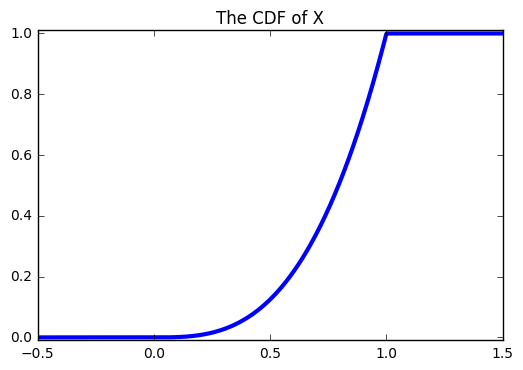

In [6]:
def F_X(x):
    if x <= 0:
        return 0
    elif x < 1:
        return x**3
    else:
        return 1

# Calculating x and y values
x = np.linspace(-0.5, 1.5, 1000); y = np.array(map(F_X, x))

# Plotting the CDF
plt.plot(x, y, lw = 3)
plt.xlim(-0.5, 1.5)
plt.ylim(-0.01, 1.01)
plt.title("The CDF of X")
plt.show()

To draw $N$ samples from the distribution, we can sample the $y$-values uniformly, we can name these samples as $\{y_1, y_2, \dots y_N\}$ and the samples will be the inverse CDF mapping of those $y$ samples, i.e. the samples of $X$ will be $\left\{x_1, x_2, \dots, x_N\right\} = \left\{F_X^{-1}(y_1), F_X^{-1}(y_2), \dots, F_X^{-1}(y_N)\right\}$. In this examples the inverse of the CDF is

\begin{align*}
  F_X^{-1}(y) &= \begin{cases}
              y^{1/3}                & \text{if }y\in[0,1] \\
             \text{undefined}        & \text{otherwise}
            \end{cases}.
\end{align*}

Let's plot 10 samples.

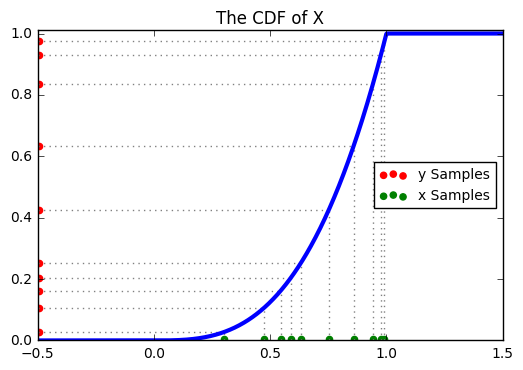

In [7]:
# Number of samples
N = 10

# Draw y samples uniformly on the interval [0,1]
y_samp = np.random.uniform(low=0, high=1, size=N)

# Definfe the inverse CDF to get x samples
def inverse_F(y):
    assert y<=1 and y>=0, "undefined value in inverse_F"
    return np.power(y,1.0/3)

# x samples
x_samp = map(inverse_F, y_samp)

# Plot y-samples in red
plt.figure(figsize=[6,4])
for i in range(N):
    y_i = y_samp[i]
    x_i = x_samp[i]
    
    # Dotted lines to show where each x value came from
    plt.axhline(y=y_i, color='gray', xmin=-0.5, xmax=(x_i+0.5)/2.0, ls=":")
    plt.axvline(x=x_i, color='gray', ymin=0, ymax=y_i, ls=":")
    
# Plotting the PDF
plt.plot(x, y, lw = 3)
plt.xlim(-0.5, 1.5)
plt.ylim(-0.0, 1.01)
plt.title("The CDF of X")

# plot y samples on vertical axis as red dots
plt.scatter(np.zeros(N)-0.495, y_samp, 
         color="red", 
         marker="o", 
         label="y Samples")

# plot x samples on horizontal axis as green dots
plt.scatter(x_samp, np.zeros(N)+0.005, 
         color="green", 
         marker="o", 
         label="x Samples")

plt.legend(loc="right", prop={'size':10})
plt.show()

The next question is how good are these samples? WE can check this by smapling 10,000 point and then we can plot a histogram and see how closely it follows the PDF.

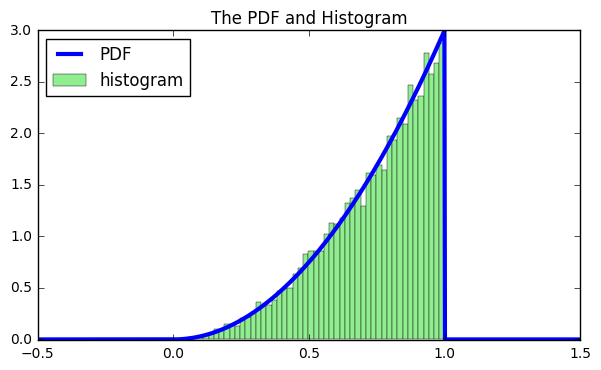

In [8]:
# Calculating x and y values
x = np.linspace(-0.5, 1.5, 1000); y = np.array(map(f_X, x))

# Plotting the PDF
plt.figure(figsize=[7,4])
plt.plot(x,y, lw = 3, label="PDF")
plt.xlim(-0.5, 1.5)
plt.ylim(-0.01, 3)
plt.title("The PDF and Histogram")

N = 10000
y_samp = np.random.uniform(low=0, high=1, size=N)
x_samples = map(inverse_F, y_samp)
plt.hist(x_samples, normed=True, bins=50, lw=0.3, color="lightgreen", label="histogram")

plt.legend(loc="upper left")
plt.show()

The plot above shows that the histogram does fit nicely inside the PDF which implies that we do in fact have a good sampling of the distribution.